# 4: Metrics to recommend users
## Different Centrality measures
### Degree Centrality
    Measures how well-connected a node is by counting the number of directed connections / edges. Nodes with high degree centrality are more likely considered special or important.
### Closeness Centrality
    Measures how quickly a node can reach all other nodes in network. For efficient communication high closeness centrality is preferable.
### Betweenness Centrality
    Identifies Nodes that acts as bridge at different parts of the network. Nodes with high Betweenness centrality have significant influence on information flow.
### Eigenvector Centrality
    Consider not only the connection but also the quality of connections. Nodes with high eigenvector centrality are connected to other influential nodes.
### PageRank
    It measures the importance of nodes in network based on number and quality of incoming links. Useful to find inluential links.


## Some Methods utilizing them in user based Recommender systems are

### Jaccard's similarities
    Randomly considering 2 nodes from the network and comparing the neighbours of each other to check for the number of commonly shared nodes, 
    It ratio with the total connections yeilds a measure which is used to check how close those 2 nodes are,
    Higher ratio means probability of they knowing eachother or becoming newfriends are high.

Nodes with high _Betweenness and Closeness Centrality_ are recommended to each others when used Jaccard's similarities.
    

In [1]:
import networkx as nx

# file = open(r"D:\study\DMS\project\testing\test2.txt", mode='r')
tweet = nx.Graph()
twt = nx.read_edgelist(r"D:\study\DMS\project\testing\first_50k_lines.txt", 
                       create_using= tweet, nodetype=int)
print(twt)

Graph with 2761 nodes and 36840 edges


In [2]:
# make a list of nodes so you can choose any 2 nodes
# and check if they have any similarities
list_nodes = list(tweet.nodes())
print(list_nodes[:5])

[214328887, 34428380, 17116707, 28465635, 380580781]


In [3]:
import random as rd
import numpy as np
simil = np.zeros(5000)
choice = []
for i in range(5000):
    choices = rd.choices(list_nodes, k=2)
    # print(choices)
    if choices[0] != choices[1]:
        neigh1 = set(tweet.neighbors(choices[0]))
        neigh2 = set(tweet.neighbors(choices[1]))

        # jaccards similarities 
        common = neigh1.intersection(neigh2)
        total = neigh2.union(neigh1)
        choice.append(choices)
        simil[i] = (len(common)/len(total))

if max(simil) > 0.5:
    print(simil.argmax(),max(simil),choice[simil.argmax()])
    print('These 2 nodes are recommended')
else: pass

2642 0.8920863309352518 [411273721, 69065385]
These 2 nodes are recommended


### Preferential attachments
    The user with high degree of connections (certainly popular persons, eg.:Virat Kohili , MS Dhoni ,etc..) are recommended to other users, being popular means they have a high probability of being followed by other users, so this concept is used to recommend users.

In [4]:
import networkx as nx
from matplotlib import pyplot as plt

    pas stands for preferential attachment score

In [5]:
twitter_undir_graph = nx.Graph()

twt = nx.read_edgelist(r"D:\study\DMS\project\data\data\twitter_combined.txt",
                       create_using = twitter_undir_graph, nodetype = int)

degree_distribution = twitter_undir_graph.degree()

# duplicating degree distribution
undir_pas = dict(degree_distribution)

# make a list of users in decending popularity
popular_undir_user = sorted(undir_pas.keys(), key=lambda x:undir_pas[x], reverse=True)

In [6]:
twitter_digraph = nx.DiGraph()

twt = nx.read_edgelist(r"D:\study\DMS\project\data\data\twitter_combined.txt",
                       create_using = twitter_digraph, nodetype = int)

indegree_distribution = twitter_digraph.in_degree()

# duplicating the indegree distribution
dir_pas = dict(indegree_distribution)


# make a list of users in decending popularity
popular_dir_user = sorted(dir_pas.keys(), key=lambda x:dir_pas[x], reverse=True)

In [7]:
# printing out the popular users in both directed and undirected graph
top5 = popular_undir_user[:5]
connections = [undir_pas[popular_undir_user[x]] for x in range(5)]
print('For undirected Graph:')
print(top5, ' are the top 5 popular users with ',connections,' connections.')

print()

top5 = popular_dir_user[:5]
connections = [dir_pas[popular_dir_user[x]] for x in range(5)]
print('For directed Graph:')
print(top5, ' are the top 5 popular users with ', connections,' followers.')

For undirected Graph:
[115485051, 40981798, 813286, 43003845, 3359851]  are the top 5 popular users with  [3383, 3239, 3011, 2758, 2490]  connections.

For directed Graph:
[115485051, 40981798, 43003845, 813286, 22462180]  are the top 5 popular users with  [3383, 3216, 2735, 2647, 2471]  followers.


    Top 5 famous followee printed above will be recommended,
    bcz they have high degree of connection which basically implies they may be popular, the end user has high probability of following a popular user.

### PageRank
    Originally developed for ranking pages in search engine but can be adapted for recommending users in social networks.
    The idea is simple, the users connected to other influential user are also considered influential.

In [8]:
import networkx as nx

twitter_graph = nx.Graph()

twt = nx.read_edgelist(r"D:\study\DMS\project\data\data\twitter_combined.txt",
                       create_using = twitter_graph, nodetype = int)

# calculate PageRank score
pagerank_scores = nx.pagerank(twitter_graph)

In [9]:
def get_top_recommendations(user, n=5):
    neighbours = list(twitter_graph.neighbors(user))

    neighbours_sorted = sorted(neighbours,
        key= lambda x: pagerank_scores[x], reverse=True)
    
    return neighbours_sorted[:n]

In [12]:
import random 

user = random.choice(list(twitter_graph.nodes()))
top_recommend = get_top_recommendations(user, n =3)
print(f'Top recommendations for User {user} : {top_recommend}')

Top recommendations for User 112001635 : [15913, 63485337, 48485771]


#### How PageRank Works ?
    As it was created for webpages, its easily understandable when explained through webpage (to node) anology.
    You visit a website and see more links connecting to other websites and click those links for several iteration once you get borred you randomly change to other webpages and again click some links and it goes on..
    you consider a webpage important if huge number of webpages links back to this website.(here scored by number of times redirected to same webpage)
    
    Nodes are replaced with webpages and are scored on their occurances and this is how PageRank works.
    it is similar to Random walk. 

### Adamic-Adar Index
    We can say it as better version of Jaccard's similarity metrics.
    
    It gives less weigth to those nodes with higher degree (in other words popular users) which would give a great boost accurate recommendations to the end user.

In [ ]:
%pip install mathjax

The Adamic-Adar Index between nodes \(i\) and \(j\) is calculated as:

\begin{align*}
\text{Adamic-Adar Index}(i, j) = \sum_{u \in \Gamma(i) \cap \Gamma(j)} \frac{1}{\log(\text{deg}(u))}
\end{align*}

Where:

\begin{align*}\Gamma(x) \ represents \ the \ set \ of \ neigbours \ of \ x\end{align*}
\\
deg(u) \ is \ the \ degree \ of \ node \ u

In [14]:
import networkx as nx

twitter_graph = nx.Graph()

twt = nx.read_edgelist(r"D:\study\DMS\project\data\data\twitter_combined.txt",
                       create_using = twitter_graph, nodetype = int)


In [15]:
import numpy
# function to calculate Adamic-Adar Index between two nodes
def adamic_adar_index(G, node1, node2):
    # Get common neighbors of node1 and node2
    common_neighbors = set(G.neighbors(node1)).intersection(set(G.neighbors(node2)))
    # print(common_neighbors)
    # Calculate the Adamic-Adar Index
    adamic_adar = 0
    for common_neighbor in common_neighbors:
        degree_common_neighbor = G.degree(common_neighbor)
        if degree_common_neighbor > 1:
            adamic_adar += 1 / (numpy.log(degree_common_neighbor))
    
    return adamic_adar

In [17]:
import random 

user1, user2 = random.choices(list(twitter_graph.nodes()), k = 2)
index = adamic_adar_index(twitter_graph, user1, user2)
print(f"Adamic-Adar Index between Node {user1} and Node {user2}: {index}")
print()
user1, user2 = 163089333,285654273
index = adamic_adar_index(twitter_graph, user1, user2)
print(f"Adamic-Adar Index between Node {user1} and Node {user2}: {index}")

Adamic-Adar Index between Node 144281297 and Node 336566753: 0

Adamic-Adar Index between Node 163089333 and Node 285654273: 4.374877588900372


### Eigenvector Centrality
    with help of an anology, we can say that if you suggest a rank A teacher for graph theory (teacher 1) they in return suggests another teacher (teacher 2) then it implies teacher 2 has more expertice in graph theory.

    for a recommender system recommending expertice for course make use of this eigenvector centrality hugely.

In [18]:
import networkx as nx
from matplotlib import pyplot as plt


In [19]:
Graph = nx.DiGraph()

# Add nodes representing users
users = ['User1', 'User2', 'User3', 'User4', 'User5', 'User6']
Graph.add_nodes_from(users)

# Add directed edges representing endorsements for skills
endorsements = [
    ('User1', 'User2'),
    ('User1', 'User3'),
    ('User2', 'User4'),
    ('User3', 'User4'),
    ('User3', 'User5'),
    ('User4', 'User6'),
    ('User5', 'User6')
]
Graph.add_edges_from(endorsements)

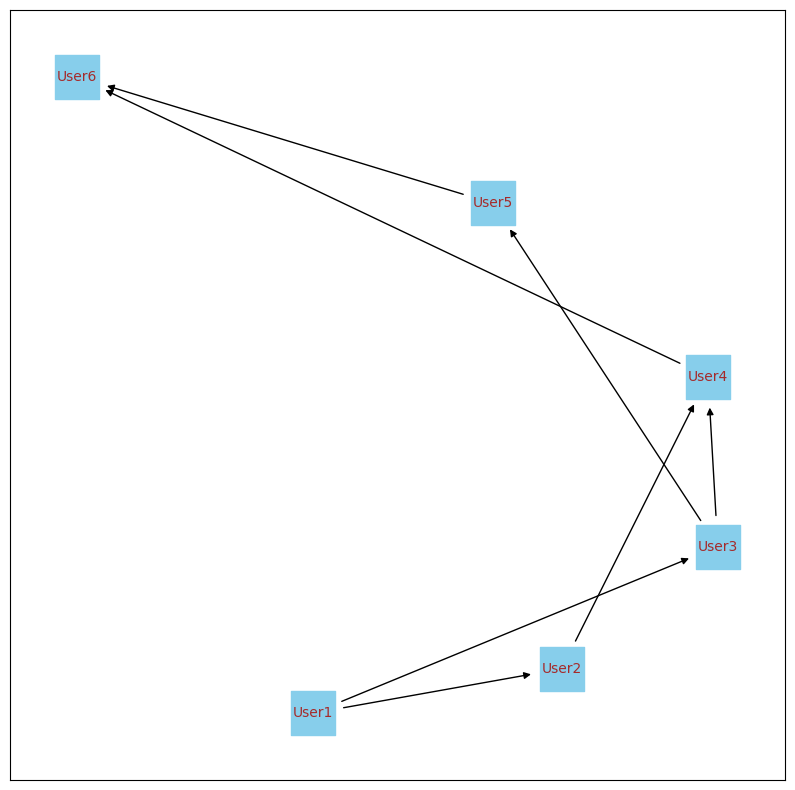

In [26]:
plt.figure(figsize=(10,10))
nx.draw_networkx(Graph, with_labels=True, pos=nx.spiral_layout(Graph), node_shape='s', node_size=1000 , arrows=True, font_size=10, font_color='brown', node_color='skyblue')

# 
    from graph it is evident that user6 has the highest eigenvector value

In [30]:

# Compute eigenvector centrality
eigenvector_centrality = nx.eigenvector_centrality(Graph, max_iter=1000)

# Sort users by eigenvector centrality (most influential users first)
sorted_users = sorted(eigenvector_centrality.items(), key=lambda x: x[1], reverse=True)

# Recommend connections based on eigenvector centrality
user_to_recommend = 'User1'
recommended_connections = []

for user, centrality in sorted_users:
    if user != user_to_recommend and Graph.has_edge(user_to_recommend, user) == False:
        recommended_connections.append(user)
        if len(recommended_connections) >= 3:  # Limit the number of recommendations
            break

print(f"Recommended connections for {user_to_recommend}: {recommended_connections}")


Recommended connections for User1: ['User6', 'User4', 'User5']
